# Applying Gaussian Naive Bayes to GISTEMP data

In [1]:
import csv
import pandas as pd
import numpy as np

file_name="/home/rusul/Desktop/Upload/global-temp-annual_csv.csv"

df1 = pd.read_csv(file_name)
#df1.dropna()
df1.head()
 
temp=df1[['Land', 'Land and Ocean', 'N Hem', 'S Hem']]   
temp.head()

,Land,Land and Ocean,N Hem,S Hem
0,-0.43,-0.21,-0.33,-0.09
1,-0.34,-0.13,-0.22,-0.03
2,-0.28,-0.16,-0.24,-0.07
3,-0.28,-0.19,-0.29,-0.08
4,-0.57,-0.27,-0.41,-0.12


In [2]:
import seaborn as sns; 
sns.pairplot(temp, height=1.5)

In [3]:
temp.loc[temp['Land and Ocean'] < 0.0, 'Warm or not'] = 0 
temp.loc[temp['Land and Ocean'] > 0.0, 'Warm or not'] = 1 

/home/rusul/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/rusul/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(new_indexer, value)
/home/rusul/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

/home/rusul/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/rusul/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


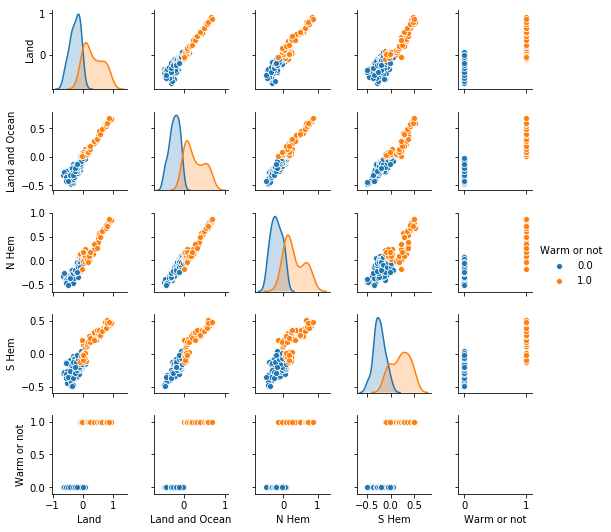

In [5]:
t=temp
sns.pairplot(t, hue='Warm or not', height=1.5)

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

X = temp.loc[:,'Land':'S Hem']
print(X.head()) 

y = temp['Warm or not']

model.fit(X, y)

   Land  Land and Ocean  N Hem  S Hem
0 -0.43           -0.21  -0.33  -0.09
1 -0.34           -0.13  -0.22  -0.03
2 -0.28           -0.16  -0.24  -0.07
3 -0.28           -0.19  -0.29  -0.08
4 -0.57           -0.27  -0.41  -0.12


GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# make a probabilistic prediction

yhat_prob = model.predict_proba(X)

yhat_class = model.predict(X)

print(yhat_prob.shape)
print(yhat_class.shape)

(135, 2)
(135,)


In [22]:
yhat_prob[:,0]

array([9.99972581e-01, 9.99458213e-01, 9.99800047e-01, 9.99909251e-01,
       9.99992993e-01, 9.99993944e-01, 9.99992395e-01, 9.99999198e-01,
       9.99985954e-01, 9.98574817e-01, 9.99999471e-01, 9.99998495e-01,
       9.99999139e-01, 9.99999567e-01, 9.99999346e-01, 9.99995667e-01,
       9.99945619e-01, 9.99952794e-01, 9.99999295e-01, 9.99987487e-01,
       9.99829091e-01, 9.99974438e-01, 9.99998779e-01, 9.99999650e-01,
       9.99999825e-01, 9.99998795e-01, 9.99996187e-01, 9.99999765e-01,
       9.99999765e-01, 9.99999782e-01, 9.99999711e-01, 9.99999748e-01,
       9.99999526e-01, 9.99999459e-01, 9.99952037e-01, 9.99668197e-01,
       9.99999267e-01, 9.99999710e-01, 9.99998948e-01, 9.99993149e-01,
       9.99996560e-01, 9.99959410e-01, 9.99996481e-01, 9.99993764e-01,
       9.99989971e-01, 9.99984297e-01, 9.93193588e-01, 9.99939103e-01,
       9.99813628e-01, 9.99999053e-01, 9.99334418e-01, 9.89699151e-01,
       9.98568105e-01, 9.99995094e-01, 9.97507583e-01, 9.99878600e-01,
      

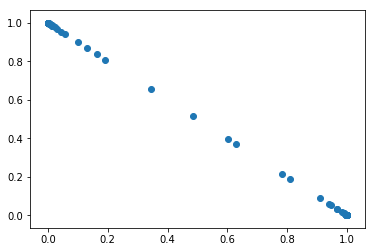

In [27]:
import matplotlib.pyplot as plt
plt.scatter(yhat_prob[:,0], yhat_prob[:,1])

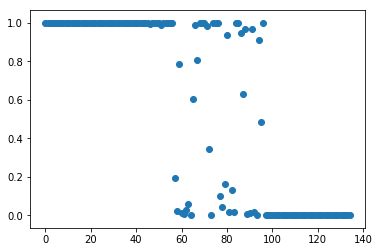

In [28]:
plt.scatter(range(len(yhat_prob)), yhat_prob[:,0])

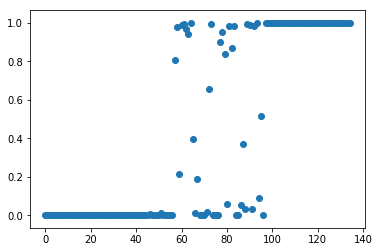

In [29]:
plt.scatter(range(len(yhat_prob)), yhat_prob[:,1])